In [ ]:
!pip install pandas==2.2.2 nltk==3.9.1 gensim==4.3.3 matplotlib==3.7.1 openpyxl==3.1.2 numpy==1.26.4 scipy==1.13.1
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import gensim
from gensim import corpora
import matplotlib.pyplot as plt
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
df = pd.read_excel('UberData.xlsx', sheet_name='Sheet1')
df = df.dropna(subset=['Comments']).drop_duplicates(subset=['Comments'])
df['Cleaned_Comments'] = df['Comments']
print(df.head())

                                            Comments Gender  \
0  Yeah calling the police only works. One my col...      F   
1  True. I had to book Uber for my maid, and the ...      F   
2  Uber is a joke. Period. Its been a joke for a ...      F   
3  I had a similar incident a couple of weeks ago...      F   
4  Yes, I learnt the hard way too.. the latest sc...      F   

                                    Cleaned_Comments  
0  Yeah calling the police only works. One my col...  
1  True. I had to book Uber for my maid, and the ...  
2  Uber is a joke. Period. Its been a joke for a ...  
3  I had a similar incident a couple of weeks ago...  
4  Yes, I learnt the hard way too.. the latest sc...  


In [ ]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    tokens = word_tokenize(str(text).lower())
    tokens = [token for token in tokens if token.isalpha() and token not in stop_words]
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return tokens

df['Cleaned_Comments'] = df['Comments'].apply(preprocess_text)
print(df['Cleaned_Comments'].head())

0    [yeah, calling, police, work, one, colleague, ...
1    [true, book, uber, maid, driver, insisted, sit...
2    [uber, joke, period, joke, quality, customer, ...
3    [similar, incident, couple, week, ago, late, n...
4    [yes, learnt, hard, way, latest, scam, driver,...
Name: Cleaned_Comments, dtype: object


In [ ]:
dictionary = corpora.Dictionary(df['Cleaned_Comments'])
dictionary.filter_extremes(no_below=5, no_above=0.5)
corpus = [dictionary.doc2bow(text) for text in df['Cleaned_Comments']]
lda_model = gensim.models.LdaModel(corpus, num_topics=20, id2word=dictionary, passes=30, random_state=42)
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)

(0, '0.117*"take" + 0.103*"route" + 0.090*"asked" + 0.066*"driver" + 0.062*"auto"')
(1, '0.126*"ride" + 0.097*"charged" + 0.073*"go" + 0.052*"time" + 0.049*"night"')
(2, '0.095*"emergency" + 0.079*"work" + 0.063*"get" + 0.063*"time" + 0.062*"number"')
(3, '0.073*"get" + 0.055*"driver" + 0.055*"help" + 0.055*"thing" + 0.055*"day"')
(4, '0.331*"trip" + 0.125*"emergency" + 0.048*"time" + 0.043*"people" + 0.043*"night"')
(5, '0.272*"customer" + 0.213*"support" + 0.116*"ride" + 0.069*"still" + 0.055*"help"')
(6, '0.097*"one" + 0.095*"app" + 0.061*"working" + 0.061*"number" + 0.061*"saying"')
(7, '0.150*"customer" + 0.141*"support" + 0.140*"even" + 0.111*"issue" + 0.064*"ca"')
(8, '0.134*"tried" + 0.107*"number" + 0.081*"like" + 0.081*"get" + 0.054*"safety"')
(9, '0.106*"email" + 0.095*"support" + 0.077*"response" + 0.070*"please" + 0.065*"customer"')
(10, '0.206*"customer" + 0.116*"driver" + 0.110*"service" + 0.084*"safety" + 0.058*"trip"')
(11, '0.174*"driver" + 0.107*"ride" + 0.075*"time"

Topic 0: ['take', 'route', 'asked'] -> Safety_Issues (Scores: S=4.0, C=0.0, R=0.0)
Topic 1: ['ride', 'charged', 'go'] -> Refund_Issues (Scores: S=2.1, C=0.0, R=4.1)
Topic 2: ['emergency', 'work', 'get'] -> Safety_Issues (Scores: S=4.4, C=1.3, R=0.0)
Topic 3: ['get', 'driver', 'help'] -> Customer_Support (Scores: S=2.0, C=3.7, R=0.0)
Topic 4: ['trip', 'emergency', 'time'] -> Safety_Issues (Scores: S=2.2, C=1.3, R=0.0)
Topic 5: ['customer', 'support', 'ride'] -> Customer_Support (Scores: S=2.0, C=7.1, R=0.0)
Topic 6: ['one', 'app', 'working'] -> Customer_Support (Scores: S=2.0, C=2.5, R=0.0)
Topic 7: ['customer', 'support', 'even'] -> Customer_Support (Scores: S=0.0, C=7.2, R=0.0)
Topic 8: ['tried', 'number', 'like'] -> Safety_Issues (Scores: S=4.5, C=0.0, R=0.0)
Topic 9: ['email', 'support', 'response'] -> Customer_Support (Scores: S=0.0, C=7.4, R=0.0)
Topic 10: ['customer', 'driver', 'service'] -> Customer_Support (Scores: S=4.5, C=6.9, R=0.0)
Topic 11: ['driver', 'ride', 'time'] -> Sa

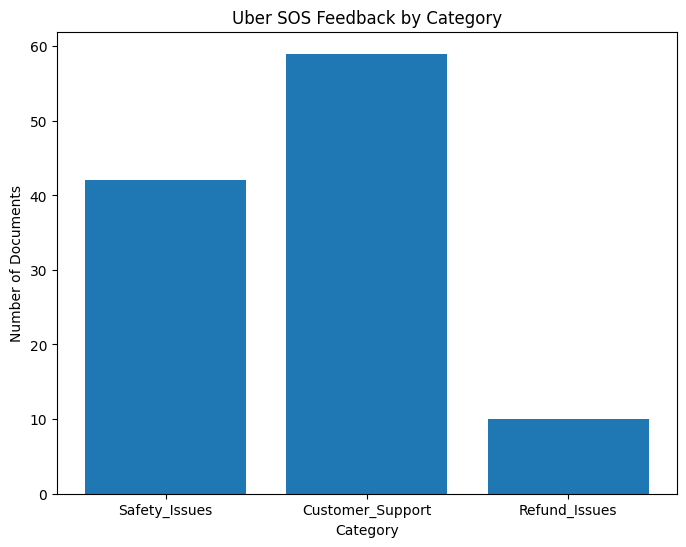

In [ ]:
safety_keywords = {
    'safety': 2.5, 'accident': 2.2, 'incident': 2.1, 'unsafe': 2.3, 'danger': 2.3,
    'harassment': 2.5, 'security': 2.1, 'panic': 2.2, 'women': 2.5, 'driver': 2.0,
    'threat': 2.5, 'assault': 2.5, 'emergency': 2.2, 'police': 2.2, 'route': 2.0,
    'rescue': 2.3, 'legal': 2.1, 'helpline': 2.0, 'sos':3.0,'button':2.5,
}
support_keywords = {
    'support': 2.5, 'customer': 2.2, 'call': 1.3, 'help': 1.2, 'response': 1.5,
    'complaint': 1.3, 'service': 1.2, 'assistance': 1.2, 'care': 2.2,
    'issue': 1.2, 'problem': 1.2, 'resolve': 1.3, 'contact': 1.3, 'joke': 1.0
}
refund_keywords = {
    'refund': 2.5, 'overcharged': 2.3, 'charged': 2.2, 'payment': 2.0, 'billing': 2.1,
    'money': 1.9, 'cost': 1.7, 'fee': 1.9, 'price': 1.7, 'deducted': 2.0, 'pay': 1.9,
    'fare': 1.9, 'dispute': 2.1, 'overcharge': 2.3, 'shown': 1.5, 'showing': 1.5
}

topic_to_category = {}
for i in range(20):
    top_words = [word for word, _ in lda_model.show_topic(i, topn=10)]
    safety_score = sum(safety_keywords.get(word, 0) for word in top_words)
    support_score = sum(support_keywords.get(word, 0) for word in top_words)
    refund_score = sum(refund_keywords.get(word, 0) for word in top_words)
    total_score = safety_score + support_score + refund_score
    if total_score == 0:
        category = 'Customer_Support'
    else:
        norm_safety = safety_score / total_score
        norm_support = support_score / total_score
        norm_refund = refund_score / total_score
        max_norm = max(norm_safety, norm_support, norm_refund)
        if norm_safety == max_norm and norm_safety > 0.25:
            category = 'Safety_Issues'
        elif norm_refund == max_norm and norm_refund > 0.25:
            category = 'Refund_Issues'
        elif norm_support == max_norm and norm_support > 0.25:
            category = 'Customer_Support'
        else:
            category = 'Customer_Support'
    topic_to_category[i] = category
    print(f"Topic {i}: {top_words[:3]} -> {category} (Scores: S={safety_score:.1f}, C={support_score:.1f}, R={refund_score:.1f})")

category_counts = {'Safety_Issues': 0, 'Customer_Support': 0, 'Refund_Issues': 0}
for idx, doc in enumerate(corpus):
    comment = df['Comments'].iloc[idx].lower()
    topic_dist = lda_model.get_document_topics(doc, minimum_probability=0)
    category_scores = {'Safety_Issues': 0, 'Customer_Support': 0, 'Refund_Issues': 0}
    comment_words = comment.split()
    safety_score = sum(safety_keywords.get(word, 0) for word in comment_words if word in safety_keywords)
    support_score = sum(support_keywords.get(word, 0) for word in comment_words if word in support_keywords)
    refund_score = sum(refund_keywords.get(word, 0) for word in comment_words if word in refund_keywords)

    for topic, prob in topic_dist:
        category = topic_to_category[topic]
        top_words = [word for word, _ in lda_model.show_topic(topic, topn=10)]
        topic_safety = sum(safety_keywords.get(word, 0) for word in top_words)
        topic_support = sum(support_keywords.get(word, 0) for word in top_words)
        topic_refund = sum(refund_keywords.get(word, 0) for word in top_words)
        max_topic_score = max(topic_safety, topic_support, topic_refund)
        if max_topic_score > 0:
            weight = max_topic_score / 10
        else:
            weight = 1.0
        category_scores[category] += prob * weight

    category_scores['Safety_Issues'] += safety_score * 0.8
    category_scores['Customer_Support'] += support_score * 0.8
    category_scores['Refund_Issues'] += refund_score * 0.8

    max_score = max(category_scores.values())
    if max_score == 0:
        category = 'Customer_Support'
    else:
        for cat, score in category_scores.items():
            if score == max_score:
                category = cat
                break
    category_counts[category] += 1

categories = ['Safety_Issues', 'Customer_Support', 'Refund_Issues']
counts = [category_counts[cat] for cat in categories]
plt.figure(figsize=(8, 6))
plt.bar(categories, counts)
plt.xlabel('Category')
plt.ylabel('Number of Documents')
plt.title('Uber SOS Feedback by Category')
plt.show()